In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Chargement du dataset sur Colab 
from google.colab import files
upload = files.upload()

Saving 50_Startups.csv to 50_Startups (1).csv


In [ ]:
# lecture du dataset sur Pandas
dataset = pd.read_csv("50_Startups.csv")
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


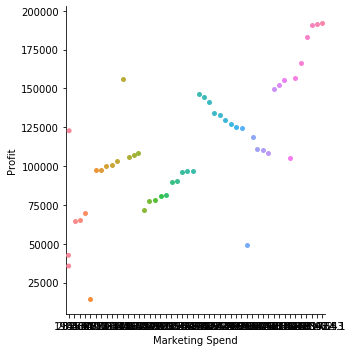

In [ ]:
# Prévisualisation des données 
### Linear Model
import seaborn as sns 
sns.catplot(x="Marketing Spend", y="Profit", data = dataset)

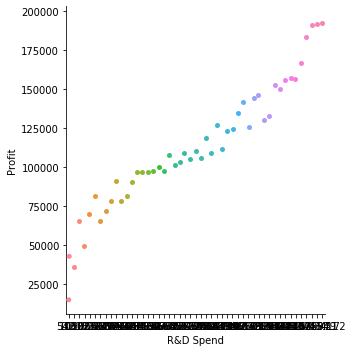

In [ ]:
sns.catplot(x="R&D Spend", y="Profit", data = dataset)

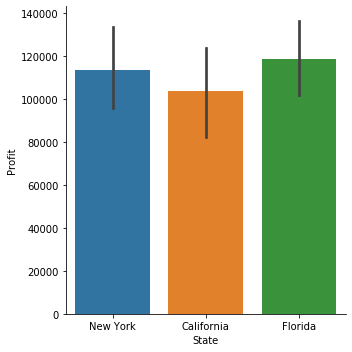

In [ ]:
sns.catplot(x="State", y="Profit", data = dataset, kind="bar")

In [ ]:
dataset.corr()["Profit"]

R&D Spend          0.972900
Administration     0.200717
Marketing Spend    0.747766
Profit             1.000000
Name: Profit, dtype: float64

In [ ]:
# Gestion des valeurs manquantes 
### Voir s'il y a des valeurs manquantes 
dataset.isnull().any()

R&D Spend          False
Administration     False
Marketing Spend    False
State              False
Profit             False
dtype: bool

In [ ]:
# Séparation des données en variables explicatives X et target y 
X = dataset.iloc[: , :-1]
y = dataset.iloc[: ,  -1]

In [ ]:
dataset["State"].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
# Dummyfication
X = pd.get_dummies(X, drop_first=True)

In [ ]:
X

,R&D Spend,Administration,Marketing Spend,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,1
1,162597.70,151377.59,443898.53,0,0
2,153441.51,101145.55,407934.54,1,0
3,144372.41,118671.85,383199.62,0,1
4,142107.34,91391.77,366168.42,1,0
5,131876.90,99814.71,362861.36,0,1
6,134615.46,147198.87,127716.82,0,0
7,130298.13,145530.06,323876.68,1,0
8,120542.52,148718.95,311613.29,0,1
9,123334.88,108679.17,304981.62,0,0


In [ ]:
# Normalisation des X
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [ ]:
X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
        -6.85994341e-01, -7.17740563e-01],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         1.45773797e+00, -7.17740563e-01],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         1.45773797e+00, -7.17740563e-01],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
        -6.85994341e-01, -7.17740563e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         1.45773797e+00, -7.17740563e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01,
        -6.85994341e-01,  1.39326109e+00],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01,
        -6.85994341e-01

In [ ]:
# Division du dataset en train et un test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=0)

In [ ]:
# Création du modèle 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regressor.coef_

array([35147.05739539,   912.09409156,  4432.05480471,  -447.48318326,
         331.29725455])

In [ ]:
y = 35147.05739539 * X1 + 912.09409156* X2 + ....

In [ ]:
# Evaluation du modèle 
regressor.score(X_test, y_test)

0.9347068473282423

In [ ]:
# Vérifcation de l'overfitting 
print(" Score de Train : {}\n Score de Test : {}".format(regressor.score(X_train, y_train), regressor.score(X_test, y_test)))

 Score de Train : 0.9501847627493607
 Score de Test : 0.9347068473282423


---> Le train est comparable au test donc pas d'overfitting.

In [ ]:
## Pas de visualisations possibles puisque nous sommes sur de la multidimensions

In [ ]:
# Classement des features par importance 
feature_importance = pd.DataFrame({"features": ['R&D Spend', 
                                                'Administration', 
                                                'Marketing Spend', 
                                                'State_Florida', 
                                                'State_New York',
                                                ], 
                                "values":regressor.coef_})

feature_importance.sort_values(["values"], ascending=False)

"""
Attention aux coefficients négatifs qui sont tout aussi important. 
State_Florida par exemple est plus important de State_New York  
puisqu'il influe négativement sur le profit
"""

"\nAttention aux coefficients négatifs qui sont tout aussi important. \nState_Florida par exemple est plus important de State_New York  \npuisqu'il influe négativement sur le profit\n"

In [ ]:
feature_importance

,features,values
0,R&D Spend,35147.057395
1,Administration,912.094092
2,Marketing Spend,4432.054805
3,State_Florida,-447.483183
4,State_New York,331.297255


R&D Spend


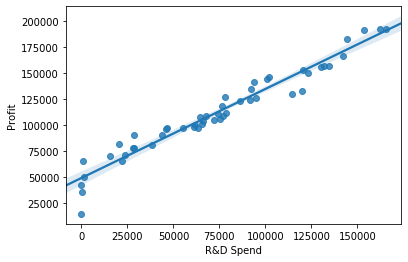

Administration


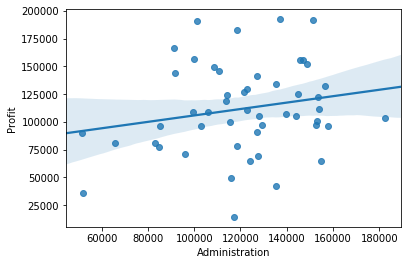

Marketing Spend


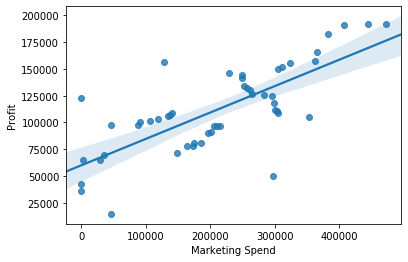

State


TypeError: ignored

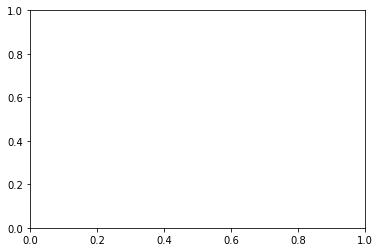

In [ ]:
for i in dataset.columns:
  print(i)
  sns.regplot(data=dataset, x=i, y="Profit")
  plt.show()

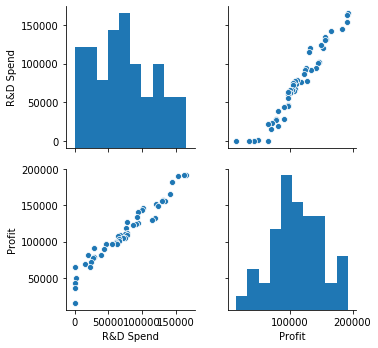

In [ ]:
sns.pairplot(dataset[["R&D Spend", "Profit"]])

In [ ]:
regressor.predict(X_test)

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

In [ ]:
regressor.score(X_test, y_test)

0.9347068473282423